In [15]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set the style of seaborn
sns.set_style("whitegrid")

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
## read the dataset 
df = pd.read_csv('data/stud.csv')

In [3]:
## show the first 5 rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## take X 
X= df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
## print the categories of each categorical column
print("Categories in 'gender' variable: ",end="" )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end="" )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end="" )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end="" )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end="" )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [7]:
## Take y
y= df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
## Create Column Transformer with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Set the categorical columns and numerical columns
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', numeric_transformer, num_features),  # Numerical features
        ('OneHotEncoder', oh_transformer, cat_features)    # Categorical features
    ],
    remainder='passthrough'  # Keep any other columns unchanged
)

In [10]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
## Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (800, 19)
Shape of X_test:  (200, 19)
Shape of y_train:  (800,)
Shape of y_test:  (200,)


In [13]:
## Create a function to evaluate the model 
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)

    return mse, rmse, r2, mae
  

In [29]:
## Create a list of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-NeighborsRegressor': KNeighborsRegressor(),
    'Decision TreeRegressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'XGBRegressor': XGBRegressor(eval_metric='rmse')
}

model_list = []
r2_list = []

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train, y_train) # Train the model
    
    # Make predictions
    y_Train_pred = model.predict(X_train)
    y_Test_pred = model.predict(X_test)
    
    # Evaluate the model
    model_train_mae , model_train_rmse, model_train_r2, model_train_mse = evaluate_model(y_train, y_Train_pred)
    model_test_mae , model_test_rmse, model_test_r2, model_test_mse = evaluate_model(y_test, y_Test_pred)
    
    #print the result 
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 28.3349
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 29.0952
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 43.4783
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 42.5063
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 29.0563
- R2 Score: 0.8806


K-NeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 32.6355
- R2 Score: 0.8552
-----------------

In [30]:
## creates a summary dataFrame of model performance.
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoostRegressor,0.851632
5,Random Forest Regressor,0.849069
6,AdaBoostRegressor,0.847577
1,Lasso,0.825320
9,XGBRegressor,0.821221
3,K-NeighborsRegressor,0.783770
7,SVR,0.728600
4,Decision TreeRegressor,0.722670


In [31]:
rd_model = Ridge()
rd_model = rd_model.fit(X_train, y_train)
y_pred = rd_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


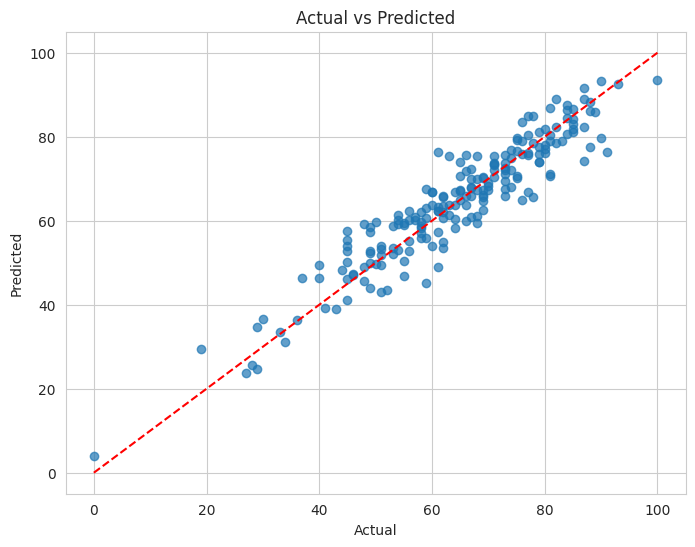

In [32]:
## plot the Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


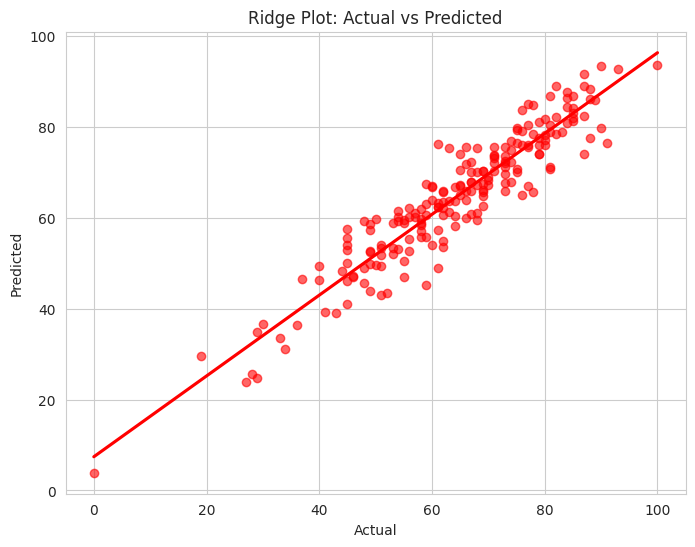

In [33]:
##  the Ridge Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', scatter_kws={'alpha':0.6})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Plot: Actual vs Predicted')
plt.grid(True)
plt.show()


In [35]:
pred_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Optional: round for cleaner view
pred_df = pred_df.round(2)

# Optional: view top 10 rows
pred_df.head(10)


,Actual Value,Predicted Value,Difference
0,91,76.40,14.60
1,53,58.84,-5.84
2,80,76.99,3.01
3,74,76.81,-2.81
4,84,87.62,-3.62
5,81,78.92,2.08
6,69,64.72,4.28
7,54,53.04,0.96
8,87,74.12,12.88
9,51,49.37,1.63
